In [1]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import pandas as pd
import yaml

In [9]:
config = yaml.full_load(open('constants/v2.yaml'))

In [12]:
labels = pd.read_csv('./data/train/labels.csv')

In [13]:
labels

,Unnamed: 0,ecchi,comedy,harem,martial arts,romance,xianxia,mature,fantasy,sci-fi,...,adventure,shoujo,xuanhuan,josei,shounen ai,drama,yuri,historical,horror,psychological
0,0,0,1,0,0,1,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
2,2,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,4,0,0,1,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,3092,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3093,3093,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3094,3094,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3095,3095,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [14]:
labels[config['Dataset']['classes']]

,action,adult,adventure,comedy,drama,ecchi,fantasy,gender bender,harem,historical,...,slice of life,smut,sports,supernatural,tragedy,wuxia,xianxia,xuanhuan,yaoi,yuri
0,1,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3093,0,0,0,1,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
3094,0,0,0,1,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3095,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [1]:
import torch
from torchvision.transforms import v2
from dataloader import training_dataset, testing_dataset
from torch.utils.data import Dataset, DataLoader

D:\ml\mtest\learn_env\lib\site-packages\diffusers\utils\outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [2]:
torch.__version__

'2.3.0+cu121'

In [3]:
torch.cuda.is_available()

True

In [76]:
dataset = DataLoader(testing_dataset, shuffle=True)

In [90]:
sample = next(iter(dataset))[0]
sample.shape

torch.Size([1, 3, 384, 256])

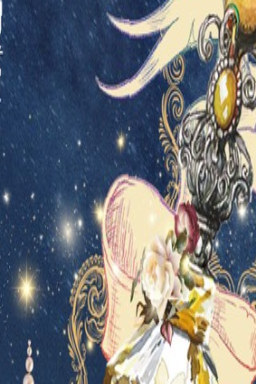

In [91]:
v2.functional.to_pil_image(sample.squeeze(0).cpu())